<img style="float: left;" src="earth-lab-logo-rgb.png" width="150" height="150" />

# Earth Analytics Education - EA  Python Course Spring 2021

## Important  - Assignment Guidelines

1. Before you submit your assignment to GitHub, make sure to run the entire notebook with a fresh kernel. To do this first, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart & Run All)
2. Always replace the `raise NotImplementedError()` code with your code that addresses the activity challenge. If you don't replace that code, your notebook will not run.

```
# YOUR CODE HERE
raise NotImplementedError()
```

3. Any open ended questions will have a "YOUR ANSWER HERE" within a markdown cell. Replace that text with your answer also formatted using Markdown.
4. **DO NOT RENAME THIS NOTEBOOK File!** If the file name changes, the autograder will not grade your assignment properly.
6. When you create a figure, comment out `plt.show()` to ensure the autograder can grade your plots. For figure cells, DO NOT DELETE the code that says `DO NOT REMOVE LINE BELOW`.

```
### DO NOT REMOVE LINE BELOW ###
student_plot1_ax = nb.convert_axes(plt)
```

* Only include the package imports, code, and outputs that are required to run your homework assignment.
* Be sure that your code can be run on any operating system. This means that:
   1. the data should be downloaded in the notebook to ensure it's reproducible
   2. all paths should be created dynamically using the `os.path.join`

## Follow to PEP 8 Syntax Guidelines & Documentation

* Run the `autopep8` tool on all cells prior to submitting (HINT: hit shift + the tool to run it on all cells at once!
* Use clear and expressive names for variables. 
* Organize your code to support readability.
* Check for code line length
* Use comments and white space sparingly where it is needed
* Make sure all python imports are at the top of your notebook and follow PEP 8 order conventions
* Spell check your Notebook before submitting it.

For all of the plots below, be sure to do the following:

* Make sure each plot has a clear TITLE and, where appropriate, label the x and y axes. Be sure to include UNITS in your labels.


### Add Your Name Below 
**Your Name: Eric Gottlieb (@esgeo)**

<img style="float: left;" src="colored-bar.png"/>

---

# Week 04 and 05 Homework - Automate NDVI Workflow

For this assignment, you will write code to generate a plot of the mean normalized difference vegetation index (NDVI) for two different sites in the United States across one year of data:

* San Joaquin Experimental Range (SJER) in Southern California, United States
* Harvard Forest (HARV) in the Northeastern United States

The data that you will use for this week is available from **earthpy** using the following download: 

`et.data.get_data('ndvi-automation')`

## Assignment Goals

Your goal in this assignment is to create the most efficient and concise workflow that you can that allows for:

1. The code to scale if you added new sites or more time periods to the analysis.
2. Someone else to understand your workflow.
3. The LEAST and most efficient (i.e. runs fast, minimize repetition) amount of code that completes the task.

### HINTS

* Remove values outside of the landsat valid range of values as specified in the metadata, as needed.
* Keep any output files SEPARATE FROM input files. Outputs should be created in an outputs directory that is created in the code (if needed) and/or tested for.
* Use the functions that we demonstrated during class to make your workflow more efficient.
* BONUS - if you  chose - you can export your data as a csv file. You will get bonus points for doing this.


## Assignment Requirements

Your submission to the GitHub repository should include:
* This Jupyter Notebook file (.ipynb) with:
    * The code to create a plot of mean NDVI across a year for  2 NEON Field Sites:
        * NDVI on the x axis and formatted dates on the y for both NEON sites on one figure/axis object
    * The **data should be cleaned to remove the influence of clouds**. See the [earthdatascience website for an example of what your plot might look like with and without removal of clouds](https://www.earthdatascience.org/courses/earth-analytics-python/create-efficient-data-workflows/).
* BONUS: Create one output `.csv` file that has 3 columns - NDVI, Date and Site Name - with values for SJER and HARV.

Your notebook should:
* Have *at least* 2 well documented and well named functions with docstrings.
* Include a Markdown cell at the top of the notebook that outlines the overall workflow using pseudocode (i.e. plain language, not code)
* Include additional Markdown cells throughout the notebook to describe: 
    * the data that you used - and where it is from
    * how data are being processing
    * how the code is optimized to run fast and be more concise

# Replace this cell with your pseudocode  for this workflow

If you happen to be a diagram person a diagram is ok too



# Pseudocode description
- Step 1: Import libraries 
- Step 2: Import data 
- Step 3: Create working directories 
- Step 4: Establish functions to perform batch operations on raster datasets  
    - Step 4a: Function to clean data in individual bands based on expected values (in this exercise 0-10000) 
    - Step 4b: Function to crop rasters for a scene that is used for a normalized difference calculation and pixel qa-based mask. The specific code is used to calculate NDVI and mask based on cloud effects using raster bands specified in a list object 
- Step 5: From the entirety of the dataset, create a sorted glob list object that has all scenes to be used  
- Step 6: Parse data from directories/filenames that will go in dataframe 
- Step 7: Create cropping object that will be used in function 4b 
- Step 8: Create list object with bands for NDVI calc 
- Step 9: Create path object for cloud mask qa used in function 4b 
- Step 10: Make for loop to first function to clean band 4 and 5 rasters
- Step 11: Create list object of pixel qa raster values to mask cloud effects (used in function 4b)
- Step 12: Create cloud effect-cleaned and cropped ndvi object using mask_crop_ndvi function 
- Step 13: Calculate np.nanmean value from Step 12 output 
- Step 14: Make datetime indexed pandas dataframe from Step 6 and Step 13 outputs 
- Step 15: Retool all of Steps 7-14 into a loop function that can applied to Step 6 scene list 
- Step 16: Concat loop output data into dataframe and deal with NaN values from cloud cover
- Step 17: Plot concatonated dataframe using for loop that allows data to be groupby() 'site' and excludes NaN values
- Step 18: Export .csv file

In [1]:
# Autograding imports - do not modify this cell
import matplotcheck.autograde as ag
import matplotcheck.notebook as nb
import matplotcheck.timeseries as ts
from datetime import datetime

In [2]:
# Import needed packages in PEP 8 order
# and no unused imports listed (10 points total)
import os
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio as rio
#from rasterio.plot import plotting_extent
import rioxarray as rxr
import xarray as xr
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
import earthpy.mask as em


# Designate working directory path as object.
mypath = os.path.join(et.io.HOME, 'earth-analytics', 'data')

# Change working directory to specified path.
if os.path.exists(mypath):
    os.chdir(mypath)
else:
    os.makedirs(mypath),
    os.chdir(mypath),
    print(
        "The path " + os.getcwd() + " did not exist, but has now been created.")

# Download data
et.data.get_data('ndvi-automation')


'C:\\Users\\12516\\earth-analytics\\data\\ndvi-automation\\.'

In [3]:
# DO NOT MODIFY THIS CELL
# Tests that the working directory is set to earth-analytics/data

path = os.path.normpath(os.getcwd())
student_wd_parts = path.split(os.sep)

if student_wd_parts[-2:] == ['earth-analytics', 'data']:
    print("\u2705 Great - it looks like your working directory is set correctly to ~/earth-analytics/data")
else:
    print("\u274C Oops, the autograder will not run unless your working directory is set to earth-analytics/data")

✅ Great - it looks like your working directory is set correctly to ~/earth-analytics/data


# Figure 1: Plot 1 - Mean NDVI For Each Site Across the Year (50 points)

Create a plot of the mean normalized difference vegetation index (NDVI) for the two different sites in the United States across the year: 

* NDVI on the x axis and formatted dates on the y for both NEON sites on one figure/axis object.
* Each site should be identified with a different color in the plot and legend.
* The final plot **data should be cleaned to remove the influence of clouds**.
* Be sure to include appropriate title and axes labels.

Add additional cells as needed for processing data (e.g. defining functions, etc), but be sure to:
* follow the instructions in the code cells that have been provided to ensure that you are able to use the sanity check tests that are provided. 
* include only the plot code in the cell identified for the final plot code below

## Task 1: 

In the cell below, create a single dataframe containing MEAN NDVI, the site name, 
and the date of the data for the HARV site 
scene `HARV/landsat-crop/LC080130302017031701T1-SC20181023151837`.  The column names for the  final
DataFrame should be`mean_ndvi`, and `site`, and the data should be **indexed on the date**. 

Use the functions that we reviewed in class (or create your own versions of them) to implement your code

### In the Cell below Place  All Functions Needed to Run this Notebook (20 points)

In [4]:
### DO NOT REMOVE THIS LINE OR EDIT / MOVE THIS CELL ###
start_time = datetime.now()

In [5]:
# Functions

# Function to open specified bands and mask any values outside specified range
def open_clean_bands(band_path,
                     valid_range=None,):
    """Open and mask a single landsat band using a valid reflectance value range.

    Parameters
    -----------
    band_path : string
        A path to the array to be opened
    valid_range : tuple (optional)
        A tuple of min and max range of values for the data. Default = None


    Returns
    -----------
    band : xarray DataArray
        An xarray DataArray with values that should be masked set to 1 for True (Boolean)
    """

    band = rxr.open_rasterio(band_path, masked=True).squeeze()

    # Only run this step if a valid range tuple is provided
    if valid_range:
        mask = ((band < valid_range[0]) | (band > valid_range[1]))
        band = band.where(~xr.where(mask, True, False))

    return band


# Function that crop rasters for a scene that is
# used for a normalized difference calculation and pixel qa-based mask
# This specific code is used to calculate NDVI and mask based on cloud effects
def mask_crop_ndvi(all_bands,
                   crop_bound,
                   pixel_qa_path,
                   vals):
    """Using specificed crop geometry, calculates NDVI and applied qa-mask. 

    Parameters
    -----------
    all_bands : list
        A list containing xarray objects for landsat bands to be opened for ndvi calculation
    crop_bound: geopandas GeoDataFrame
        A geopandas dataframe to be used to crop the raster data using rasterio mask().
    pixel_qa_path: string
        A path to a pixel qa tif file.
    vals: list
        A list of values needed to create the cloud mask


    Returns
    -----------
    ndvi_crop_mask : Xarray Dataset
        a cropped and masked xarray object containing NDVI values
    """

    # Make object that is crop boundary geometry
    crop_json = crop_bound.geometry

    # Open and clip qa layer using above object
    pixel_qa = rxr.open_rasterio(
                pixel_qa_path[0], masked=True).rio.clip(
                crop_json, from_disk=True).squeeze()

    # Calculate normalized difference (in this case NDVI)
    # all_bands[1] is landsat band 5 (NIR) and all_bands[0] is band 4 (red)
    ndvi_xr = (all_bands[1]-all_bands[0]) / (all_bands[1]+all_bands[0])

    # Create cropped norm. diff. xarray object using same crop boundary object
    ndvi_cropped = ndvi_xr.rio.clip(crop_json, from_disk=True)

    # Apply pixel qa-based mask to cropped xarray
    ndvi_crop_mask = ndvi_cropped.where(~pixel_qa.isin(vals))

    # Output xarray
    return ndvi_crop_mask


The code cell below is an exercise in directory parsing, data extraction, and data processing on a single scene. For this exercise the scene is found in the directory: 
earth-analytics/data/ndvi-automation/HARV/landsat-crop/LC080130302017031701T1-SC20181023151837

At the beginning of the code cell, a sorted glob list of all the sites in the HARV and SJER directories is created. For the purpose of this exercise, the 5th scene in the sorted list is the one we are asked to work with, and the next block of code deals with parsing the site name (HARV) and the date (2017-03-17) from that scene.

The extent of the vector data in the dataset is then used to create a cropping boundary for the raster data.

Next the open_clean_bands and mask_crop_ndvi functions are run on the specified scene.

Finally a pandas dataframe is created from the date, mean NDVI value and site name, which is then indexed by date.

In [6]:

# Path/directory configurations- re-used for Task 2 (loop)
path = os.path.join("ndvi-automation", "sites")

all_sites = sorted(glob(os.path.join(path, "*", "*", "*/")))


# Parse site name for Task 1 (single scene)
# Normpath() of specified scene from sorted glob list
scene_5_dir = os.path.normpath(all_sites[4])

# Split path directories into individual string variables in a list
path_components = scene_5_dir.split(os.sep)

# Make object from 3rd (index[2]) item in list
site = path_components[2]

# Parse date for Task 1 (single scene)
# Parse specified scene filename as string
scene_5 = os.path.basename(os.path.normpath(all_sites[4]))

# Parse date from filename
date = scene_5[10:18]

# Extract crop geometry for Task 1 (single scene)
# Designate directory containing vector file used to crop
vector_dir = os.path.join(path, site, "vector")

# Create object that is path to shapefile by joining pre-existing objects
crop_extent = os.path.join(vector_dir,  site + "-crop.shp")

#Create crop boundary using geopandas to read shapefile in above path
crop_bound = gpd.read_file(crop_extent)


# For loop to run open_clean_bands function to clean band 4 and 5 rasters
# Create empty object to populate with .append
all_bands = []

# Create list object with bands for NDVI calc for Task 1 (single scene)
band_paths = sorted(
    glob(os.path.join(scene_5_dir, "*band*[4-5].tif")))

# For loop that runs open_clean_bands function used in NDVI calculation
# and appends the cleaned band rasters to the newly created all_bands object
for aband in band_paths:
    all_bands.append(open_clean_bands(band_path=aband,
                                      valid_range=(0, 10000)))

    
# Create cleaned ndvi object using mask_crop_ndvi function

# Create list objects of pixel qa raster values to mask cloud effects
high_cloud_confidence = em.pixel_flags["pixel_qa"]["L8"]["High Cloud Confidence"]
cloud = em.pixel_flags["pixel_qa"]["L8"]["Cloud"]
cloud_shadow = em.pixel_flags["pixel_qa"]["L8"]["Cloud Shadow"]

# Combine list objects into 1d array to be used in mask_crop_ndvi function
vals = cloud_shadow + cloud + high_cloud_confidence

# Create path object for cloud mask qa raster for Task 1 (single scene)
pixel_qa_path = glob(os.path.join(scene_5_dir, "*qa*"))

# The resultant object has been cropped and cleaned for cloud effects
ndvi_clean = mask_crop_ndvi(all_bands=all_bands,
                            crop_bound=crop_bound,
                            pixel_qa_path=pixel_qa_path,
                            vals=vals)


# Create dataframe of specified columns, populating mean_ndvi using np.nanmean
scene_5_df = pd.DataFrame(columns=["date", "mean_ndvi", "site"], data=[
                          [date, np.nanmean(ndvi_clean), site]])

# Convert date to datetime format
scene_5_df['date'] = pd.to_datetime(scene_5_df['date'], format='%Y%m%d')

# Set date as index
scene_5_df.set_index('date', inplace=True)

# Call dataframe
scene_5_df

,mean_ndvi,site
date,,
2017-03-17,0.281132,HARV


In [7]:
# This cell  is testing your data output above

student_ndvi_ts_single_site = _

single_scene_points = 0

# Ensure the data is stored in a dataframe.
if isinstance(student_ndvi_ts_single_site, pd.DataFrame):
    print('\u2705 Your data is stored in a DataFrame!')
    single_scene_points += 1
else:
    print('\u274C It appears your data is not stored in a DataFrame. ',
          'To see what type of object your data is stored in, check its type with type(object)')

# Ensure that the date column is the index
if isinstance(student_ndvi_ts_single_site.index, pd.core.indexes.datetimes.DatetimeIndex):
    print('\u2705 You have the index set to the date column!')
    single_scene_points += 2
else:
    print('\u274C You do not have the index set to the date column.')

# Ensure that the date column is datetime
if isinstance(student_ndvi_ts_single_site.index[0], pd._libs.tslibs.timestamps.Timestamp):
    print('\u2705 The data in your date column is datetime!')
    single_scene_points += 2
else:
    print('\u274C The data in your date column is not datetime.')

# Ensure the site name is correct
if student_ndvi_ts_single_site.site.values[0] == 'HARV':
    print('\u2705 You have the correct site name!')
    single_scene_points += 5
else:
    print('\u274C You do not have the correct site name.')

if np.allclose(0.281131628228094, student_ndvi_ts_single_site.mean_ndvi.values[0]):
    print('\u2705 You have the correct mean NDVI value!')
    single_scene_points += 5
else:
    print('\u274C You do not have the correct mean ndvi value.')

print("\n \u27A1 You received {} out of 15 points for creating a dataframe.".format(
    single_scene_points))
single_scene_points

✅ Your data is stored in a DataFrame!
✅ You have the index set to the date column!
✅ The data in your date column is datetime!
✅ You have the correct site name!
✅ You have the correct mean NDVI value!

 ➡ You received 15 out of 15 points for creating a dataframe.


15

## Task 2:

In the cell below, process all of the landsat scenes. Create a DataFrame that contains the following 
information for each scene


|   | index  | site  | mean_ndvi  | 
|---|---|---|---|
| Date  |   |   |   |
|  2017-01-07  | 0  | SJER  | .4  |  

Be sure to call your dataframe at the end of the cell to ensure autograding works.
HINT: FOR THIS STEP, leave any rows containing missing values (`NAN`).

The code cell below is basically just an expansion of the single scene code above into a for loop that runs the NDVI calculation on every scene in the directory.

Intuitively it makes sense that what I did for the single scene and have repeated here in a loop could be functionalized. However, I am still a little shaky on how to execute this, and unfortunately resorted to being repetitive.

The only real difference between the code cell below and the one for the single scene is that I added a pd.reset_index line so that there was an index column in the pandas df.

In [8]:
# Loop through each site directory to create a date-indexed df
# with site and mean_ndvi variables

# Create blank object to populate
alldata = []

# For loop that extracts objects to be converted to df variables
for site_dir in all_sites:
    # Split path of each scene directory
    path_components = site_dir.split(os.sep)
    
    # Assign 'site' string from above list as object
    site = path_components[2]
    
    # Parse date variable from each scene filename in list
    date = os.path.basename(
        os.path.normpath(site_dir))[10:18]
    
    # Make pixel qa raster directory object for each scene in list
    pixel_qa_path = glob(
        os.path.join(site_dir, "*qa*"))
    
    # Make vector directory path object
    vector_dir = os.path.join(
        path, site, "vector")
    
    # Make crop_extent directory object from shapefile of respective scene
    crop_extent = os.path.join(
        vector_dir, site + "-crop.shp")
    
    # Use geopandas to create crop_bound directory object
    crop_bound = gpd.read_file(crop_extent)
    
    # Make dir_name that is the respective scene name
    dir_name = os.path.basename(
        os.path.normpath(site_dir))
    
    # Create sorted glob list of bands needed for norm diff calculation
    band_paths = sorted(
        glob(os.path.join(site_dir, "*band*[4-5].tif")))

    # Re-create blank object to populate in nested loop
    all_bands = []
    
    # Nested for loop to run open_clean_bands function on each band from given scene
    for aband in band_paths:
        # runs open_clean_bands function used in NDVI calculation for each scene
        # and appends the cleaned band rasters to the re-created all_bands object
        all_bands.append(open_clean_bands(
            band_path=aband, valid_range=(0, 10000)))

    # Create cleaned ndvi object using mask_crop_ndvi function
    # The resultant object has been cropped and cleaned for cloud effects
    ndvi_clean = mask_crop_ndvi(all_bands=all_bands,
                                crop_bound=crop_bound,
                                pixel_qa_path=pixel_qa_path,
                                vals=vals)

    # Run np.nanmean for each scene
    mean_ndvi = np.nanmean(ndvi_clean)

    # Make an row of data for each scene to be appended
    all_scenes = pd.DataFrame(columns=["date", "site",
                                       "mean_ndvi"],
                                        data=[[date, site, mean_ndvi]]
                                        )
   
    # Added this line so the dataframe was identical to the example at top
    all_scenes.reset_index(inplace = True)
    
    # Format parsed date string into datetime object
    all_scenes['date'] = pd.to_datetime(
        all_scenes['date'], format='%Y%m%d')
    
    # Populate alldata object created just before start of loop
    alldata.append(all_scenes)

# Concat data into pandas dataframe
all_data = pd.concat(alldata)

# Set index by date
all_data_indexed = all_data.set_index("date")

# Call dataframe object
all_data_indexed

<ipython-input-8-d0ab17fd4069>:60: RuntimeWarning: Mean of empty slice
  mean_ndvi = np.nanmean(ndvi_clean)
<ipython-input-8-d0ab17fd4069>:60: RuntimeWarning: Mean of empty slice
  mean_ndvi = np.nanmean(ndvi_clean)
<ipython-input-8-d0ab17fd4069>:60: RuntimeWarning: Mean of empty slice
  mean_ndvi = np.nanmean(ndvi_clean)
<ipython-input-8-d0ab17fd4069>:60: RuntimeWarning: Mean of empty slice
  mean_ndvi = np.nanmean(ndvi_clean)
<ipython-input-8-d0ab17fd4069>:60: RuntimeWarning: Mean of empty slice
  mean_ndvi = np.nanmean(ndvi_clean)
<ipython-input-8-d0ab17fd4069>:60: RuntimeWarning: Mean of empty slice
  mean_ndvi = np.nanmean(ndvi_clean)
<ipython-input-8-d0ab17fd4069>:60: RuntimeWarning: Mean of empty slice
  mean_ndvi = np.nanmean(ndvi_clean)
<ipython-input-8-d0ab17fd4069>:60: RuntimeWarning: Mean of empty slice
  mean_ndvi = np.nanmean(ndvi_clean)
<ipython-input-8-d0ab17fd4069>:60: RuntimeWarning: Mean of empty slice
  mean_ndvi = np.nanmean(ndvi_clean)
<ipython-input-8-d0ab17fd406

,index,site,mean_ndvi
date,,,
2017-01-12,0,HARV,NaN
2017-01-28,0,HARV,NaN
2017-02-13,0,HARV,NaN
2017-03-01,0,HARV,NaN
2017-03-17,0,HARV,0.281132
2017-04-02,0,HARV,0.251133
2017-04-18,0,HARV,0.541080
2017-05-04,0,HARV,0.568924
2017-05-20,0,HARV,0.811310


In [9]:
# Last sanity check before creating your plot (10 points)

# Ensure that you call your dataframe at the bottom of the cell above
# and that it has columns called: mean_ndvi and site

# Ensure the data is stored in a dataframe.
student_ndvi_df = _

df_points = 0

if isinstance(student_ndvi_df, pd.DataFrame):
    print('\u2705 Your data is stored in a DataFrame!')
    df_points +=2
else:
    print('\u274C It appears your data is not stored in a DataFrame. ',
          'To see what type of object your data is stored in, check its type with type(object)')

# Check that dataframe contains the appropriate number of NAN values
if student_ndvi_df.mean_ndvi.isna().sum() == 15:
    print('\u2705 Correct number of masked data values!')
    df_points +=2
else:
    print('\u274C The amount of null data in your dataframe is incorrect.')


# Ensure that the date column is the index
if isinstance(student_ndvi_df.index, pd.core.indexes.datetimes.DatetimeIndex):
    print('\u2705 You have the index set to the date column!')
    df_points +=3
else:
    print('\u274C You do not have the index set to the date column.')

# Ensure that the date column is datetime
if isinstance(student_ndvi_df.index[0], pd._libs.tslibs.timestamps.Timestamp):
    print('\u2705 The data in your date column is datetime!')
    df_points +=3
else:
    print('\u274C The data in your date column is not datetime.')

# Output for timer, # DO NOT MODIFY
end_time = datetime.now()
total_time = end_time - start_time
print(
    "Your total run time for processing the data was {0}.".format(total_time))

print("\n \u27A1 You received {} out of 10 points for creating a dataframe.".format(
    df_points))

df_points

✅ Your data is stored in a DataFrame!
✅ Correct number of masked data values!
✅ You have the index set to the date column!
✅ The data in your date column is datetime!
Your total run time for processing the data was 0:00:19.202295.

 ➡ You received 10 out of 10 points for creating a dataframe.


10

The cell below plots the data (Mean NDVI result vs date). The plot executes by looping though the pandas dataframe and assigning a symbol color based on the site (green for HARV, brown for SJER). 

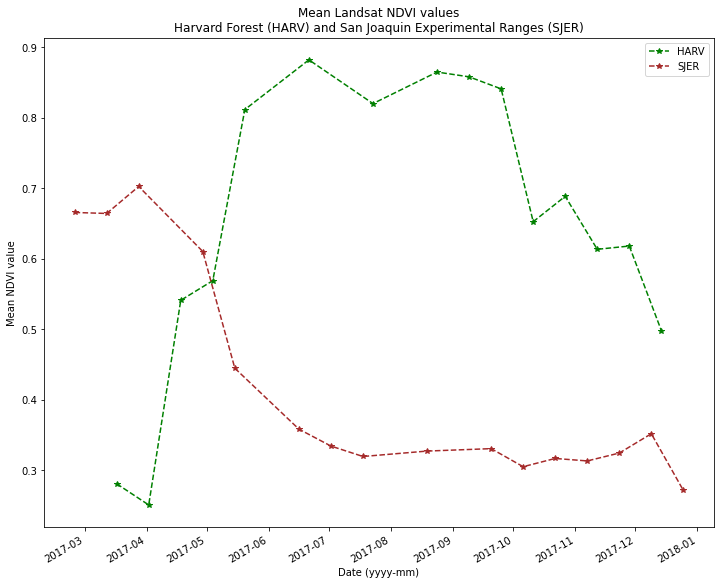

In [10]:
# Eliminate NaN values for plotting
all_data_indexed.dropna(inplace=True)

# Reset index for plotting
all_data_indexed.reset_index(inplace=True)

# Call fig object
fig, ax = plt.subplots(figsize=(12, 10))

# For loop to groupby 'site' and color datapoints accordingly
for title, group in all_data_indexed.groupby('site'):
    if title == "HARV":
        set_color = "green"
    else:
        set_color = "brown"
    
    # Plot grouped data
    group.groupby('site').plot(ax=ax,
                               x='date',
                               y='mean_ndvi',
                               title="Mean Landsat NDVI values\nHarvard Forest (HARV) and San Joaquin Experimental Ranges (SJER)",
                               xlabel="Date (yyyy-mm)",
                               ylabel="Mean NDVI value",
                               label=title,
                               style='*--',
                               color=set_color)



### DO NOT REMOVE LINES BELOW ###
final_masked_solution = nb.convert_axes(plt, which_axes="current")

In [11]:
# Ignore this cell for the autograding tests


In [12]:
# Ignore this cell for the autograding tests


# Question 1 (10 points)

Imagine that you are planning NEON’s upcoming flight season to capture remote sensing data in these locations and want to ensure that you fly the area when the vegetation is the most green.

When would you recommend the flights take place for each site? 

Answer the question in 2-3 sentences in the Markdown cell below.

Based on the data above, the flights should occur during different times of the year to take advantage of maximum greenness and best weather windows. The data show for SJER in 2017, max mean NDVI was observed between late February and early April. Timing the absolute maximum greenup would likely be highly dependent on the timing, quantity and quality (i.e., rain, snow, duration) of winter precipitation that had just been received. For example, a larger snowpack may delay greenup, but a dry winter season might cause early greenup.

For the Harvard Forest site, max greenup in 2017 was ongoing from late spring to early fall. However, the maximum mean value was observed in early summer when the data are more sparse (due to cloud effects). Conversely, early fall had almost as high mean NDVI values and the data were less affected by cloudcover. Potentially longer lead climate prediction products from NOAA could help assess the risk of cloud interference in early summer vs early fall for an upcoming season (at least you would have someone else to blame!)   

# Question 2 (10 points)

How could you modify your workflow to look at vegetation changes over time in each site? 

Answer the question in 2-3 sentences in the Markdown cell below.

This workflow could be easily modified to look at normalized differences in other multispectral parameters such as changes in CIR or (in case of a fire) NBR values. The workflow is designed such that the `mask_crop_ndvi` function can be retooled to use different band inputs. This would require one or two basic steps:

The first is that the band_paths object would need to be modified to include the appropriate bands, which could be easily done by just changing index values to use the required bands
band_paths = sorted(glob(os.path.join(site_dir, "*band*[4-5].tif")))

In this case, because the NBR calcuation is also a normalized difference, one could actually use the same `mask_crop_ndvi` function but simply just change some object names for bookkeeping

The second involves changing the function because there are more inputs, as would be the case in looking at something like mean CIR over time. Because there are 3 bands (instead of 2) used for CIR analyses, the function would need a CIR calcuation line of code added that uses the appropriate bands. 

# Do not edit this cell! (10 points)

The notebook includes:
* additional Markdown cells throughout the notebook to describe: 
    * the data that you used - and where it is from
    * how data are being processing
    * how the code is optimized to run fast and be more concise

# Do not edit this cell! (20 points)

The notebook will also be checked for overall clean code requirements as specified at the **top** of this notebook. Some of these requirements include (review the top cells for more specifics): 

* Notebook begins at cell [1] and runs on any machine in its entirety.
* PEP 8 format is applied throughout (including lengths of comment and code lines).
* No additional code or imports in the notebook that is not needed for the workflow.
* Notebook is fully reproducible. This means:
   * reproducible paths using the os module.
   * data downloaded using code in the notebook.
   * all imports at top of notebook.

## BONUS - Export a  .CSV File to Share (10 points possible)

This is optional - if you export a **.csv** file with the columns specified above: Site, Date and NDVI Value you can get an additional 10 points.

* FULL CREDIT: File exists in csv format and contains the columns specified.
We will check your github repo for this file!


In [13]:
# Output csv of indexed pandas dataframe

# Create output path for csv file
output_path = os.path.join("ndvi-automation",
                           "outputs")

if not os.path.isdir(output_path):
    os.mkdir(output_path)

# Change working directory to output path
os.chdir(output_path)

# Export to .csv, include nan values as NaN instead of default
all_data_indexed.to_csv('mean-ndvi.csv', na_rep='NaN')
